---

## Сверточные слои и пулинговые



---

Сначала мы посмотрим, как свёртки влияют на изображение и попрактикуемся в вычислении свёрток и пулингов от различных изображений.

Для начала напомним, что такое свёртка:

### Convolution (свёртка)

<img src="https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif" width=450 height=400>

То есть мы берём фильтр размера FxF, умножаем его на область изображения размером FxF поэлементно, складываем получившиеся поэлемнетные произведения и записываем это число в результирующий тензор.

Если картинка размера HxWx3, то фильтр будет размер FxFx3, и поэлементное произведение будет по всему объёму, то есть третья размерность фильтра всегда свопадает с третьей размерностью входного тензора.

---

Посмотрим на то, как применение свёртки с определёнными фильтрами влияет на изображение: (Статья на эту тему https://habr.com/ru/post/142818/)

In [ ]:
img_url = 'https://cdn.pixabay.com/photo/2018/09/18/19/47/crocodile-3687036__480.jpg'

!wget $img_url

img_path = 'crocodile-3687036__480.jpg'

--2020-07-22 01:42:26--  https://cdn.pixabay.com/photo/2018/09/18/19/47/crocodile-3687036__480.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97048 (95K) [image/jpeg]
Saving to: ‘crocodile-3687036__480.jpg’

crocodile-3687036__ 100%[===================>]  94.77K  --.-KB/s    in 0.01s   

2020-07-22 01:42:26 (7.70 MB/s) - ‘crocodile-3687036__480.jpg’ saved [97048/97048]



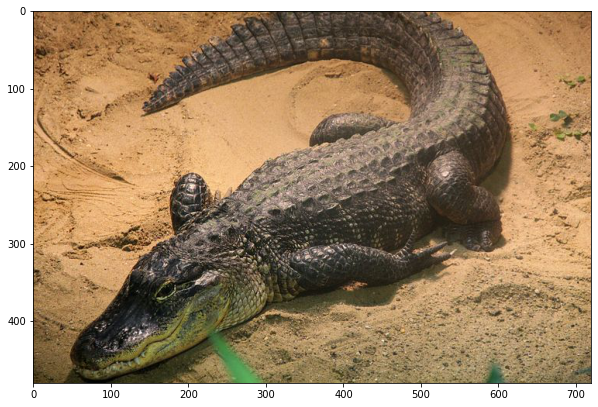

In [ ]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt

def checkByte(a):
    if a > 255:
        a = 255
    if a < 0:
        a = 0
    return a
  

def conv(a, b):
    sum = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            sum += a[i][j] * b[i][j]
    return sum
  

def median(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[ceil(len(c)/2)]
  

def max(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[len(c)-1]
  

def min(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[0]

im = Image.open(img_path)
pixels = im.load()

plt.figure(figsize=(10, 7))
plt.imshow(im);

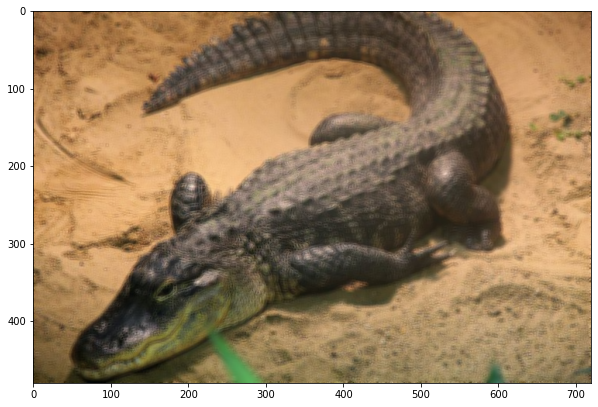

In [ ]:
imFinal = im.copy()
pixels2 = imFinal.load()
'''
filter = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]'''

filter = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 4, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]
'''
filter = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
]
'''

'''
filter = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]
'''

'''
filter = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]'''

# статья, в которой подробно о div https://habr.com/ru/post/43895/
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), im.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), im.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = checkByte(round(conv(matrR, filter) / div))
        g = checkByte(round(conv(matrG, filter) / div))
        b = checkByte(round(conv(matrB, filter) / div))

       # r = checkByte(min(matrR))
       # g = checkByte(min(matrG))
       # b = checkByte(min(matrB))
        '''
        if r < 512:
            pixels2[i, j] = (255, 255, 255)
        else:
            pixels2[i, j] = (0, 0, 0)'''
        pixels2[i, j] = (r, g, b)
        
plt.figure(figsize=(10, 7))
plt.imshow(imFinal);

### Задание 1:
Попробуйте поменять фильтр и посмотреть, что будет.

---

Давайте немного потренируемся в вычислении размера результата применения свёртки к картинке:

### Задание 2

Вычислить размер результата после применения свёртки, $I$ -- размеры входного изображения, $f$ -- размеры фильтра:

1). Пример: $I$ = (50, 50, 3), $f$ = (3, 3), $stride$ = 1. Вычисляем (на доске/листочке нагляднее): 
по ширине: 50 - 3 + 1 = 48,  
по высоте: 50 - 3 + 1 = 48,   
то есть размер результата будет (48, 48)

2). $I$ = (1024, 768, 3), $f$=(5,5), $stride$ = 2

3). $I$ = (500, 700, 5), $f$=(7,4), $stride$ = 2

Выведите общую формулу для $I$ = (H, W, C), $f$=(F, F) (фильтры обычно всё же квадратные)

    *тут пишем формулу*






Напомним, что $padding$ -- это окружение картинки нулями (рамка) (или чем-то другим) для того, чтобы придать изображению после свёртки нужный размер (пэддинг делается до свёртки).

    *тут пишем формулу с учётом padding'а*

**Доп вопросы для самоконтроля:**

- Что такое свёртка?
- Фильтр?
- Stride?
- Padding?

### Pooling

Pooling (пулинг) -- операция, нужная для уменьшения размерности по ширине и по высоте. Можно брать очень много операций в качестве пулинга, например, минимум из элементов, максимум, среднее, сумму и т.д.

Обычно используется max- и avg-pooling.

Пример применения max-pooling'а:

<img src="https://i.stack.imgur.com/W9a9n.jpg">

Примеры применения max и avg pooling'ов:


<img src="https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling.png">

Если на вход подаётся изображение с несколькими каналами, то пулинг берётся по каналам, то есть если это цветная картинка HxWxC, и мы применяем к ней pooling 2x2, то получим на выходе (H // 2) x (W // 2) x C